 # Windows Host Explorer
 &lt;details&gt;
     <summary> <u>Details...</u></summary>

 **Notebook Version:** 1.0<br>
 **Python Version:** Python 3.6 (including Python 3.6 - AzureML)<br>
 **Required Packages**: kqlmagic, msticpy, pandas, numpy, matplotlib, bokeh, networkx, ipywidgets, ipython, scikit_learn, dnspython, ipwhois, folium, maxminddb_geolite2<br>
 **Platforms Supported**:
 - Azure Notebooks Free Compute
 - Azure Notebooks DSVM
 - OS Independent

 **Data Sources Required**:
 - Log Analytics - SecurityAlert, SecurityEvent (EventIDs 4688 and 4624/25), AzureNetworkAnalytics_CL, Heartbeat
 - (Optional) - VirusTotal, AlienVault OTX, IBM XForce, Open Page Rank, (all require accounts and API keys)
 &lt;/details&gt;

 Brings together a series of queries and visualizations to help you determine the security state of the Windows host or virtual machine that you are investigating.


<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Windows-Host-Explorer" data-toc-modified-id="Windows-Host-Explorer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Windows Host Explorer</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Get-WorkspaceId-and-Authenticate-to-Azure-Sentinel" data-toc-modified-id="Get-WorkspaceId-and-Authenticate-to-Azure-Sentinel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get WorkspaceId and Authenticate to Azure Sentinel</a></span><ul class="toc-item"><li><span><a href="#Authentication-and-Configuration-Problems" data-toc-modified-id="Authentication-and-Configuration-Problems-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Authentication and Configuration Problems</a></span></li></ul></li></ul></li><li><span><a href="#Search-for-a-Host-name-and-query-host-properties" data-toc-modified-id="Search-for-a-Host-name-and-query-host-properties-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Search for a Host name and query host properties</a></span></li><li><span><a href="#Related-Alerts" data-toc-modified-id="Related-Alerts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Related Alerts</a></span><ul class="toc-item"><li><span><a href="#Browse-List-of-Related-Alerts" data-toc-modified-id="Browse-List-of-Related-Alerts-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Browse List of Related Alerts</a></span></li></ul></li><li><span><a href="#Host-Logons" data-toc-modified-id="Host-Logons-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Host Logons</a></span><ul class="toc-item"><li><span><a href="#Successful-Logons---Timeline-and-LogonType-breakdown" data-toc-modified-id="Successful-Logons---Timeline-and-LogonType-breakdown-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Successful Logons - Timeline and LogonType breakdown</a></span></li><li><span><a href="#Failed-Logons" data-toc-modified-id="Failed-Logons-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Failed Logons</a></span><ul class="toc-item"><li><span><a href="#Accounts-With-Failed-And-Successful-Logons" data-toc-modified-id="Accounts-With-Failed-And-Successful-Logons-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Accounts With Failed And Successful Logons</a></span></li></ul></li></ul></li><li><span><a href="#Other-Security-Events" data-toc-modified-id="Other-Security-Events-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Other Security Events</a></span><ul class="toc-item"><li><span><a href="#Parse-Event-Data-for-Selected-Events" data-toc-modified-id="Parse-Event-Data-for-Selected-Events-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Parse Event Data for Selected Events</a></span></li><li><span><a href="#Account-Change-Events---Timeline" data-toc-modified-id="Account-Change-Events---Timeline-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Account Change Events - Timeline</a></span></li><li><span><a href="#Show-Details-of-Selected-Events" data-toc-modified-id="Show-Details-of-Selected-Events-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Show Details of Selected Events</a></span></li></ul></li><li><span><a href="#Examine-Logon-Sessions" data-toc-modified-id="Examine-Logon-Sessions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Examine Logon Sessions</a></span><ul class="toc-item"><li><span><a href="#Browse-logon-account-details" data-toc-modified-id="Browse-logon-account-details-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Browse logon account details</a></span></li><li><span><a href="#View-distinct-host-logon-patterns" data-toc-modified-id="View-distinct-host-logon-patterns-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>View distinct host logon patterns</a></span></li><li><span><a href="#Analyze-Processes-Patterns-for-logon-sessions" data-toc-modified-id="Analyze-Processes-Patterns-for-logon-sessions-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Analyze Processes Patterns for logon sessions</a></span><ul class="toc-item"><li><span><a href="#Compute-the-relative-rarity-of-processes-in-each-session" data-toc-modified-id="Compute-the-relative-rarity-of-processes-in-each-session-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Compute the relative rarity of processes in each session</a></span></li><li><span><a href="#Overview-of-session-timelines-for-sessions-with-higher-rarity-score" data-toc-modified-id="Overview-of-session-timelines-for-sessions-with-higher-rarity-score-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Overview of session timelines for sessions with higher rarity score</a></span></li><li><span><a href="#View-the-processes-for-these-Sessions" data-toc-modified-id="View-the-processes-for-these-Sessions-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>View the processes for these Sessions</a></span></li></ul></li><li><span><a href="#Browse-All-Sessions-(Optional)" data-toc-modified-id="Browse-All-Sessions-(Optional)-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Browse All Sessions (Optional)</a></span><ul class="toc-item"><li><span><a href="#Step-1---Select-a-logon-ID-and-Type" data-toc-modified-id="Step-1---Select-a-logon-ID-and-Type-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Step 1 - Select a logon ID and Type</a></span></li><li><span><a href="#Step-2---Pick-a-logon-session-to-view-its-processes" data-toc-modified-id="Step-2---Pick-a-logon-session-to-view-its-processes-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>Step 2 - Pick a logon session to view its processes</a></span></li></ul></li></ul></li><li><span><a href="#Check-for-IOCs-in-Commandline-for-selected-session" data-toc-modified-id="Check-for-IOCs-in-Commandline-for-selected-session-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check for IOCs in Commandline for selected session</a></span><ul class="toc-item"><li><span><a href="#Extract-IoCs" data-toc-modified-id="Extract-IoCs-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Extract IoCs</a></span></li><li><span><a href="#If-any-Base64-encoded-strings,-decode-and-search-for-IoCs-in-the-results." data-toc-modified-id="If-any-Base64-encoded-strings,-decode-and-search-for-IoCs-in-the-results.-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>If any Base64 encoded strings, decode and search for IoCs in the results.</a></span></li><li><span><a href="#Threat-Intel-Lookup" data-toc-modified-id="Threat-Intel-Lookup-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Threat Intel Lookup</a></span></li></ul></li><li><span><a href="#Network-Check-Communications-with-Other-Hosts" data-toc-modified-id="Network-Check-Communications-with-Other-Hosts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Network Check Communications with Other Hosts</a></span><ul class="toc-item"><li><span><a href="#Query-Flows-by-Host-IP-Addresses" data-toc-modified-id="Query-Flows-by-Host-IP-Addresses-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Query Flows by Host IP Addresses</a></span></li><li><span><a href="#Flow-Summary" data-toc-modified-id="Flow-Summary-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Flow Summary</a></span></li><li><span><a href="#Choose-ASNs/IPs-to-Check-for-Threat-Intel-Reports" data-toc-modified-id="Choose-ASNs/IPs-to-Check-for-Threat-Intel-Reports-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Choose ASNs/IPs to Check for Threat Intel Reports</a></span></li><li><span><a href="#GeoIP-Map-of-External-IPs" data-toc-modified-id="GeoIP-Map-of-External-IPs-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>GeoIP Map of External IPs</a></span></li></ul></li><li><span><a href="#Appendices" data-toc-modified-id="Appendices-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Appendices</a></span><ul class="toc-item"><li><span><a href="#Available-DataFrames" data-toc-modified-id="Available-DataFrames-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Available DataFrames</a></span></li><li><span><a href="#Saving-Data-to-Excel" data-toc-modified-id="Saving-Data-to-Excel-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Saving Data to Excel</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#msticpyconfig.yaml-configuration-File" data-toc-modified-id="msticpyconfig.yaml-configuration-File-11.0.1"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span><code>msticpyconfig.yaml</code> configuration File</a></span></li></ul></li></ul></li></ul></div>

## Notebook Initialization
This cell:

- Checks for the correct Python version
- Checks versions and optionally installs required packages
- Imports the required packages into the notebook
- Sets a number of configuration options.

This should complete without errors. If you encounter errors or warnings look at the following two notebooks:
- [TroubleShootingNotebooks](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/TroubleShootingNotebooks.ipynb)
- [ConfiguringNotebookEnvironment](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)

You may also need to do some additional configuration to successfully use functions such as Threat Intelligence service lookup and Geo IP lookup. See the <a href="#Configuration">Configuration</a> section at the end of the notebook and the [ConfiguringNotebookEnvironment](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb).


In [1]:
# Imports
import importlib
import os
import sys
import warnings
from IPython.display import display, HTML, Markdown

display(HTML("<h3>Starting Notebook setup...</h3>"))
warn_mssg = []
err_mssg = []
MISSING_PKG_ERR = """
    <h3><font color='red'>Warning {package} is not installed or has an incorrect version</h3></font>
    For more details, please go to the <a href="#Setup">Setup section</a> at the end of the notebook.
    """
MIN_REQ_PYTHON = (3, 6)
PANDAS_REQ_VERSION = (0, 25, 0)
MSTICPY_REQ_VERSION = (0, 2, 7)
if sys.version_info < MIN_REQ_PYTHON:
    display(HTML("""
    <h2><font color='red'>Incorrect notebook kernel version detected</h2></font>
    Please check the <b>Kernel->Change Kernel</b> menu and ensure that <b>Python 3.6</b><br>
    or later is selected as the active kernel."""))
    raise RuntimeError("Python %s.%s or later kernel is required." % MIN_REQ_PYTHON)

print(
    "Python kernel version %s.%s.%s" % (
        sys.version_info[0], sys.version_info[1], sys.version_info[2]
    )
)
try:
    import msticpy
    mp_version = tuple([int(v) for v in msticpy.__version__.split(".")])
    if mp_version < MSTICPY_REQ_VERSION:
        raise ImportError("msticpy %s.%s.%s or later is required." % MSTICPY_REQ_VERSION)
    print("msticpy imported version %s" % msticpy.__version__)
except ImportError:
    display(HTML(MISSING_PKG_ERR.format(package="msticpy")))
    resp = input("Install the package now? (y/n)")
    if resp.casefold().startswith("y"):
        !pip install --user --upgrade msticpy
        warn_mssg.append("msticpy was installed or upgraded.")
        if "msticpy" in sys.modules:
            importlib.reload(msticpy)
        else:
            import msticpy

try:
    from IPython import get_ipython
    import ipywidgets as widgets
    from pathlib import Path
    import matplotlib.pyplot as plt
    from matplotlib import MatplotlibDeprecationWarning
    import seaborn as sns
    import numpy as np
    import pandas as pd
    pd_version = tuple([int(v) for v in pd.__version__.split(".")])
    if pd_version < PANDAS_REQ_VERSION:
        display(HTML(MISSING_PKG_ERR.format(package="pandas")))
        resp = input("Install the package now? (y/n)")
        if resp.casefold().startswith("y"):
            warn_mssg.append("pandas was installed or upgraded.")
            !pip install --user --upgrade pandas
            if "pandas" in sys.modules:
                importlib.reload(pd)
            else:
                import pandas as pd
    print("pandas imported version %s" % pd.__version__)
    from msticpy.data import QueryProvider
    from msticpy.nbtools import *
    from msticpy.sectools import *
    from msticpy.nbtools.foliummap import FoliumMap
    from msticpy.nbtools.utility import md, md_warn
    from msticpy.nbtools.wsconfig import WorkspaceConfig
    
    additional_packages = []
    if additional_packages:
        utils.check_and_install_missing_packages(additional_packages)
        
    from ipwhois import IPWhois

except ImportError as imp_err:
    display(HTML("""
    <h2><font color='red'>One or more missing packages detected</h2>
    Please correct these by installing the required packages, restart
    the kernel and re-run the notebook.</font>
    <i>Package error: %s</i><br>
    """ % imp_err))
    err_mssg.append("One or more missing packages found.")

else:
    mp_path = os.environ.get("MSTICPYCONFIG", "./msticpyconfig.yaml")
    if not Path(mp_path).exists():
        display(HTML("""
        <h3><font color='orange'>Warning: no <i>msticpyconfig.yaml</i> found</h3></font>
        Some functionality (such as Threat Intel lookups) will not function without valid configuration
        settings. 
        Please go to the <a href="#Setup">Setup section</a> follow the instructions there.
        """))
        warn_mssg.append("msticpyconfig.yaml not found.")

    WIDGET_DEFAULTS = {
        "layout": widgets.Layout(width="95%"),
        "style": {"description_width": "initial"},
    }

    # Some of our dependencies (networkx) still use deprecated Matplotlib
    # APIs - we can't do anything about it, so suppress them from view
    warnings.simplefilter("ignore", category=MatplotlibDeprecationWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    sns.set()
    pd.set_option("display.max_rows", 100)
    pd.set_option("display.max_columns", 50)
    pd.set_option("display.max_colwidth", 100)
    os.environ["KQLMAGIC_LOAD_MODE"]="silent"

with_errs = "<br>with %s errors" % len(err_mssg) if err_mssg else ""
with_warns = "<br>with %s warnings" % len(warn_mssg) if warn_mssg else ""

if err_mssg:
    display(HTML("<font color='red'><h3>Errors:</h3>" + '<br>'.join(err_mssg)))
if warn_mssg:
    display(HTML("<font color='red'><h3>Warnings:</h3>" + '<br>'.join(warn_mssg)))

display(HTML("<h3>Notebook setup complete</h3>" + with_errs + with_warns))


Python kernel version 3.6.7
msticpy imported version 0.4.0
pandas imported version 0.25.3


 ## Get WorkspaceId and Authenticate to Azure Sentinel
 &lt;details&gt;
     <summary><u>Details...</u></summary>
 If you are using user/device authentication, run the following cell.
 - Click the 'Copy code to clipboard and authenticate' button.
 - This will pop up an Azure Active Directory authentication dialog (in a new tab or browser window). The device code will have been copied to the clipboard.
 - Select the text box and paste (Ctrl-V/Cmd-V) the copied value.
 - You should then be redirected to a user authentication page where you should authenticate with a user account that has permission to query your Log Analytics workspace.

 Use the following syntax if you are authenticating using an Azure Active Directory AppId and Secret:
 ```
 %kql loganalytics://tenant(aad_tenant).workspace(WORKSPACE_ID).clientid(client_id).clientsecret(client_secret)
 ```
 instead of
 ```
 %kql loganalytics://code().workspace(WORKSPACE_ID)
 ```

 Note: you may occasionally see a JavaScript error displayed at the end of the authentication - you can safely ignore this.<br>
 On successful authentication you should see a ```popup schema``` button.
 To find your Workspace Id go to [Log Analytics](https://ms.portal.azure.com/#blade/HubsExtension/Resources/resourceType/Microsoft.OperationalInsights%2Fworkspaces). Look at the workspace properties to find the ID.
 &lt;/details&gt;

In [4]:
#See if we have an Azure Sentinel Workspace defined in our config file, if not let the user specify Workspace and Tenant IDs
from msticpy.nbtools.wsconfig import WorkspaceConfig
# WorkspaceConfig.list_workspaces()
# ws_config = WorkspaceConfig(workspace="My_Workspace_Name")
# calling WorkspaceConfig with no parameters will load the default workspace from msticpyconfig.yaml
# or fall back on a config.json file.
ws_config = WorkspaceConfig()
try:
    ws_id = ws_config['workspace_id']
    ten_id = ws_config['tenant_id']
    config = True
    md("Workspace details collected from config file")
except KeyError:
    md(('Please go to your Log Analytics workspace, copy the workspace ID'
                 ' and/or tenant Id and paste here to enable connection to the workspace and querying of it..<br> '))
    ws_id_wgt = nbwidgets.GetEnvironmentKey(env_var='WORKSPACE_ID',
                                        prompt='Please enter your Log Analytics Workspace Id:', auto_display=True)
    ten_id_wgt = nbwidgets.GetEnvironmentKey(env_var='TENANT_ID',
                                         prompt='Please enter your Log Analytics Tenant Id:', auto_display=True)
    config = False


Please wait. Loading Kqlmagic extension...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


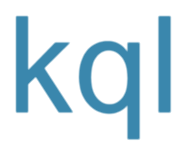

<IPython.core.display.Javascript object>

In [5]:
if config is False:
    ws_id = ws_id_wgt.value
    ten_id = ten_id_wgt.value
# Establish a query provider for Azure Sentinel and connect to it
qry_prov = QueryProvider('LogAnalytics')
qry_prov.connect(connection_str=ws_config.code_connect_str)
table_index = qry_prov.schema_tables

### Authentication and Configuration Problems

<br>
<details>
    <summary>Click for details about configuring your authentication parameters</summary>
    
    
The notebook is expecting your Azure Sentinel Tenant ID and Workspace ID to be configured in one of the following places:
- `config.json` in the current folder
- `msticpyconfig.yaml` in the current folder or location specified by `MSTICPYCONFIG` environment variable.
    
For help with setting up your `config.json` file (if this hasn't been done automatically) see the [`ConfiguringNotebookEnvironment`](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb) notebook in the root folder of your Azure-Sentinel-Notebooks project. This shows you how to obtain your Workspace and Subscription IDs from the Azure Sentinel Portal. You can use the SubscriptionID to find your Tenant ID). To view the current `config.json` run the following in a code cell.

```%pfile config.json```

For help with setting up your `msticpyconfig.yaml` see the [Setup](#Setup) section at the end of this notebook and the [ConfigureNotebookEnvironment notebook](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)
</details>

[Contents](#Contents)
 # Search for a Host name and query host properties

In [6]:
host_text = widgets.Text(
    description="Enter the Host name to search for:", **WIDGET_DEFAULTS
)
display(host_text)

Text(value='', description='Enter the Host name to search for:', layout=Layout(width='95%'), style=Description…

In [7]:
query_times = nbwidgets.QueryTime(units="day", max_before=20, before=5, max_after=1)
query_times.display()

HTML(value='<h4>Set query time boundaries</h4>')

In [8]:
# Get single event - try process creation
if "SecurityEvent" not in table_index:
    raise ValueError("No Windows event log data available in the workspace")
host_name = None
matching_hosts_df = qry_prov.WindowsSecurity.list_host_processes(
    query_times, host_name=host_text.value.strip(), add_query_items="| distinct Computer"
)
if len(matching_hosts_df) > 1:
    print(f"Multiple matches for '{host_text.value}'. Please select a host from the list.")
    choose_host = nbwidgets.SelectString(
        item_list=list(matching_hosts_df["Computer"].values),
        description="Select the host.",
        auto_display=True,
    )
elif not matching_hosts_df.empty:
    host_name = matching_hosts_df["Computer"].iloc[0]
    print(f"Unique host found: {host_name}")
else:
    print(f"Host not found: {host_text.value}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unique host found: MSTICAlertsWin1


In [10]:
if not host_name:
    host_name = choose_host.value

host_entity = None
if not matching_hosts_df.empty:
    host_entity = entities.Host(src_event=matching_hosts_df[matching_hosts_df["Computer"] == host_name].iloc[0])
if not host_entity:
    raise LookupError(f"Could not find Windows events the name {host_name}")

def populate_heartbeat_details(host_hb_df, host_entity=None):
    if not host_hb_df.empty:
        host_hb = host_hb_df.iloc[0]
        if not host_entity:
            host_entity = entities.Host(host_hb["Computer"])
        host_entity.SourceComputerId = host_hb["SourceComputerId"]
        host_entity.OSType = host_hb["OSType"]
        host_entity.OSMajorVersion = host_hb["OSMajorVersion"]
        host_entity.OSMinorVersion = host_hb["OSMinorVersion"]
        host_entity.ComputerEnvironment = host_hb["ComputerEnvironment"]
        host_entity.ResourceId = host_hb["ResourceId"]
        host_entity.OmsSolutions = [
            sol.strip() for sol in host_hb["Solutions"].split(",")
        ]
        host_entity.VMUUID = host_hb["VMUUID"]

        ip_entity = entities.IpAddress()
        ip_entity.Address = host_hb["ComputerIP"]
        geoloc_entity = entities.GeoLocation()
        geoloc_entity.CountryName = host_hb["RemoteIPCountry"]
        geoloc_entity.Longitude = host_hb["RemoteIPLongitude"]
        geoloc_entity.Latitude = host_hb["RemoteIPLatitude"]
        ip_entity.Location = geoloc_entity
        host_entity.IPAddress = ip_entity  # TODO change to graph edge
    return host_entity

def convert_to_ip_entities(ip_str):
    iplocation = GeoLiteLookup()
    ip_entities = []
    if ip_str:
        if "," in ip_str:
            addrs = ip_str.split(",")
        elif " " in ip_str:
            addrs = ip_str.split(" ")
        else:
            addrs = [ip_str]
        for addr in addrs:
            ip_entity = entities.IpAddress()
            ip_entity.Address = addr.strip()
            iplocation.lookup_ip(ip_entity=ip_entity)
            ip_entities.append(ip_entity)
    return ip_entities

# Add this information to our inv_host_entity
def populate_host_aznet_ips(az_net_df, host_entity):
    retrieved_address = []
    if len(az_net_df) == 1:
        host_entity.private_ips = convert_to_ip_entities(
            az_net_df["PrivateIPAddresses"].iloc[0]
        )
        host_entity.public_ips = convert_to_ip_entities(
            az_net_df["PublicIPAddresses"].iloc[0]
        )
        retrieved_address = [ip.Address for ip in host_entity.public_ips]
    else:
        if "private_ips" not in host_entity:
            host_entity.private_ips = []
        if "public_ips" not in host_entity:
            host_entity.public_ips = []


iplocation = GeoLiteLookup()

# Try to get an OMS Heartbeat for this computer
if "Heartbeat" in table_index:
    print(f"Looking for {host_name} in OMS Heartbeat data...")
    host_hb_df = qry_prov.Network.get_heartbeat_for_host(host_name=host_name)
    host_entity = populate_heartbeat_details(host_hb_df, host_entity)

if "AzureNetworkAnalytics_CL" in table_index:
    print(f"Looking for {host_name} IP addresses in network flows...")
    az_net_df = qry_prov.Network.get_ips_for_host(host_name=host_name)
    populate_host_aznet_ips(az_net_df, host_entity)

md("Host Details", "bold")
print(host_entity)


Looking for MSTICAlertsWin1 in OMS Heartbeat data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Looking for MSTICAlertsWin1 IP addresses in network flows...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{ 'AdditionalData': {},
  'ComputerEnvironment': 'Azure',
  'HostName': 'MSTICAlertsWin1',
  'IPAddress': { 'AdditionalData': {},
                 'Address': '40.76.43.124',
                 'Location': { 'AdditionalData': {},
                               'CountryName': 'United States',
                               'Latitude': 38.71,
                               'Longitude': -78.16,
                               'Type': 'geolocation'},
                 'Type': 'ipaddress'},
  'NetBiosName': 'MSTICAlertsWin1',
  'OSMajorVersion': '10',
  'OSMinorVersion': '0',
  'OSType': 'Windows',
  'OmsSolutions': [ '"security"',
                    '"changeTracking"',
                    '"networkMonitoring"',
                    '"serviceMap"',
                    '"dnsAnalytics"',
                    '"securityCenterFree"',
                    '"securityInsights"',
                    '"windowsEventForwarding"'],
  'ResourceId': '/subscriptions/40dcc8bf-0478-4f3b-b275-ed0a94f2c013/resourceG

[Contents](#Contents)
 # Related Alerts
 Look for any related alerts around this time.

In [11]:
ra_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=query_times.origin_time,
    max_before=28,
    max_after=5,
    before=5,
    auto_display=True,
)

HTML(value='<h4>Set query time boundaries</h4>')

In [15]:

related_alerts = qry_prov.SecurityAlert.list_related_alerts(
    ra_query_times, host_name=host_entity.HostName
)

def print_related_alerts(alertDict, entityType, entityName):
    if len(alertDict) > 0:
        display(
            Markdown(
                f"### Found {len(alertDict)} different alert types related to this {entityType} (`{entityName}`)"
            )
        )
        for (k, v) in alertDict.items():
            print(f"- {k}, # Alerts: {v}")
    else:
        print(f"No alerts for {entityType} entity `{entityName}`")


if isinstance(related_alerts, pd.DataFrame) and not related_alerts.empty:
    host_alert_items = (
        related_alerts[["AlertName", "TimeGenerated"]]
        .groupby("AlertName")
        .TimeGenerated.agg("count")
        .to_dict()
    )
    print_related_alerts(host_alert_items, "host", host_entity.HostName)
    if len(host_alert_items) > 1:
        nbdisplay.display_timeline(
            data=related_alerts, title="Alerts", source_columns=["AlertName"], height=200
        )
else:
    display(Markdown("No related alerts found."))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Found 9 different alert types related to this host (`MSTICAlertsWin1`)

- Detected potentially suspicious use of Telegram tool, # Alerts: 2
- Detected the disabling of critical services, # Alerts: 2
- Digital currency mining related behavior detected, # Alerts: 1
- Potential attempt to bypass AppLocker detected, # Alerts: 4
- Security incident detected, # Alerts: 2
- Security incident with shared process detected, # Alerts: 3
- Suspicious Activity Detected, # Alerts: 1
- Suspicious system process executed, # Alerts: 2
- Suspiciously named process detected, # Alerts: 1


Loading BokehJS ...

 ## Browse List of Related Alerts
 Select an Alert to view details

In [16]:
def disp_full_alert(alert):
    global related_alert
    related_alert = SecurityAlert(alert)
    nbdisplay.display_alert(related_alert, show_entities=True)

recenter_wgt = widgets.Checkbox(
    value=True,
    description='Center subsequent query times round selected Alert?',
    disabled=False,
    **WIDGET_DEFAULTS
)
if related_alerts is not None and not related_alerts.empty:
    related_alerts["CompromisedEntity"] = related_alerts["Computer"]
    display(Markdown("### Click on alert to view details."))
    display(recenter_wgt)
    rel_alert_select = nbwidgets.AlertSelector(
        alerts=related_alerts,
        action=disp_full_alert,
    )
    rel_alert_select.display()
    


### Click on alert to view details.

Checkbox(value=True, description='Center subsequent query times round selected Alert?', layout=Layout(width='9…

[Contents](#toc)
 # Host Logons
 This section looks at successful and failed logons on the host.

In [17]:
# set the origin time to the time of our alert
origin_time = (related_alert.TimeGenerated 
               if recenter_wgt.value 
               else query_times.origin_time)
logon_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=origin_time,
    before=5,
    after=1,
    max_before=20,
    max_after=20,
)
logon_query_times.display()


HTML(value='<h4>Set query time boundaries</h4>')

## Successful Logons - Timeline and LogonType breakdown

In [19]:
host_logons = qry_prov.WindowsSecurity.list_host_logons(
    logon_query_times, host_name=host_entity.HostName
)

if host_logons is not None and not host_logons.empty:
    display(Markdown("### Logon timeline."))
    tooltip_cols = [
        "TargetUserName",
        "TargetDomainName",
        "SubjectUserName",
        "SubjectDomainName",
        "LogonType",
        "IpAddress",
    ]
    nbdisplay.display_timeline(
        data=host_logons,
        group_by="TargetUserName",
        source_columns=tooltip_cols,
        legend="right", yaxis=True
    )

    display(Markdown("### Counts of logon events by logon type."))
    display(Markdown("Min counts for each logon type highlighted."))
    logon_by_type = (
        host_logons[["Account", "LogonType", "EventID"]]
        .astype({'LogonType': 'int32'})
        .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
               left_on="LogonType", right_index=True)
        .drop(columns="LogonType")
        .groupby(["Account", "LogonTypeDesc"])
        .count()
        .unstack()
        .rename(columns={"EventID": "LogonCount"})
        .fillna(0)
        .style
        .background_gradient(cmap="viridis", low=0.5, high=0)
        .format("{0:0>3.0f}")
    )
    display(logon_by_type)
else:
    display(Markdown("No logon events found for host."))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logon timeline.

Loading BokehJS ...

### Counts of logon events by logon type.

Min counts for each logon type highlighted.

 <a></a>[Contents](#toc)
 ## Failed Logons

In [20]:
failedLogons = qry_prov.WindowsSecurity.list_host_logon_failures(
    logon_query_times, host_name=host_entity.HostName
)
if failedLogons.empty:
    print("No logon failures recorded for this host between ",
          f" {logon_query_times.start} and {logon_query_times.end}"
        )
else:
    nbdisplay.display_timeline(
        data=host_logons.query('TargetLogonId != "0x3e7"'),
        overlay_data=failedLogons,
        alert=related_alert,
        title="Logons (blue=user-success, green=failed)",
        source_columns=tooltip_cols,
        height=200,
    )
    display(failedLogons
 .astype({'LogonType': 'int32'})
 .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
               left_on="LogonType", right_index=True)
 [['Account', 'EventID', 'TimeGenerated',
  'Computer', 'SubjectUserName', 'SubjectDomainName',
   'TargetUserName', 'TargetDomainName',
   'LogonTypeDesc','IpAddress', 'WorkstationName'
  ]])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading BokehJS ...

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,TargetUserName,TargetDomainName,LogonTypeDesc,IpAddress,WorkstationName
0,MSTICAlertsWin1\ian,4625,2019-02-12 20:28:38.637,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,ian,MSTICAlertsWin1,Interactive,::1,MSTICAlertsWin1


### Accounts With Failed And Successful Logons
This query joins failed and successful logons for the same account name. Multiple logon failures followed by a sucessful logon might indicate attempts to guess or probe the user password.

In [22]:
if not failedLogons.empty:
    combined = pd.concat([failedLogons,
                          host_logons[host_logons["TargetUserName"]
                                      .isin(failedLogons["TargetUserName"]
                                            .drop_duplicates())]])
    display(combined.head())
    combined["LogonStatus"] = combined.apply(lambda x: "Failed" if x.EventID == 4625 else "Success", axis=1)
    nbdisplay.display_timeline(data=combined,
                               group_by="LogonStatus",
                               source_columns=["TargetUserName", "LogonType", "SubjectUserName", "TargetLogonId"],
                               legend="inline",
                               yaxis=True,
                               height=200)
    display(combined.sort_values("TimeGenerated"))
else:
    md(f"No logon failures recorded for this host between {logon_query_times.start} and {logon_query_times.end}") 

,TenantId,Account,EventID,TimeGenerated,SourceComputerId,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonProcessName,LogonType,AuthenticationPackageName,Status,IpAddress,WorkstationName,TimeCreatedUtc
0,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4625,2019-02-12 20:28:38.637,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-0-0,,seclogo,2,Negotiate,0xc000006d,::1,MSTICAlertsWin1,2019-02-12 20:28:38.637
54,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:41:17.310,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x7ad58d,Advapi,4,Negotiate,,-,MSTICAlertsWin1,2019-02-12 20:41:17.310
61,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:29:51.030,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x5d5ace,seclogo,2,Negotiate,,::1,MSTICAlertsWin1,2019-02-12 20:29:51.030
62,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:29:51.030,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x5d5af2,seclogo,2,Negotiate,,::1,MSTICAlertsWin1,2019-02-12 20:29:51.030


Loading BokehJS ...

,TenantId,Account,EventID,TimeGenerated,SourceComputerId,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonProcessName,LogonType,AuthenticationPackageName,Status,IpAddress,WorkstationName,TimeCreatedUtc,LogonStatus
0,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4625,2019-02-12 20:28:38.637,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-0-0,,seclogo,2,Negotiate,0xc000006d,::1,MSTICAlertsWin1,2019-02-12 20:28:38.637,Failed
61,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:29:51.030,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x5d5ace,seclogo,2,Negotiate,,::1,MSTICAlertsWin1,2019-02-12 20:29:51.030,Success
62,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:29:51.030,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x5d5af2,seclogo,2,Negotiate,,::1,MSTICAlertsWin1,2019-02-12 20:29:51.030,Success
54,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4624,2019-02-12 20:41:17.310,263a788b-6526-4cdc-8ed9-d79402fe4aa0,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,0x7ad58d,Advapi,4,Negotiate,,-,MSTICAlertsWin1,2019-02-12 20:41:17.310,Success


[Contents](#Contents)
# Other Security Events
 It's often useful to look at what other events were being logged
 at the time of the attack.
 
 We show events here grouped by Account. Things to look for are:
 
 - Unexpected events that change system security such as the addition of accounts or services
 - Event types that occur for only a single account - especially if there are a lot of event types only executed by a single account.

In [23]:
md(f"Collecting Windows Event Logs for {host_entity.HostName}, this may take a few minutes...")

all_events_df = qry_prov.WindowsSecurity.list_host_events(
    logon_query_times,
    host_name=host_entity.HostName,
    add_query_items="| where EventID != 4688 and EventID != 4624",
)

# Create a pivot of Event vs. Account
win_events_acc = all_events_df[["Account", "Activity", "TimeGenerated"]].copy()
win_events_acc = win_events_acc.replace("-\\-", "No Account").replace(
    {"Account": ""}, value="No Account"
)
win_events_acc["Account"] = win_events_acc.apply(lambda x: x.Account.split("\\")[-1], axis=1)
event_pivot = (
    pd.pivot_table(
        win_events_acc,
        values="TimeGenerated",
        index=["Activity"],
        columns=["Account"],
        aggfunc="count",
    )
    .fillna(0)
    .reset_index()
)
display(Markdown("Yellow highlights indicate account with highest event count"))
(
    event_pivot.style
    .applymap(lambda x: "color: white" if x == 0 else "")
    .applymap(
        lambda x: "background-color: lightblue"
        if not isinstance(x, str) and x > 0
        else ""
    )
    .set_properties(subset=["Activity"], **{"width": "400px", "text-align": "left"})
    .highlight_max(axis=1)
    .hide_index()
)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Yellow highlights indicate account with highest event count

Activity,DWM-1,DWM-2,IUSR,LOCAL SERVICE,MSTICAdmin,MSTICAlertsWin1$,NETWORK SERVICE,No Account,SYSTEM,ian
1100 - The event logging service has shut down.,0,0,0,0,0,0,0,1,0,0
4608 - Windows is starting up.,0,0,0,0,0,0,0,1,0,0
4616 - The system time was changed.,0,0,0,2,0,0,0,0,0,0
4625 - An account failed to log on.,0,0,0,0,0,0,0,0,0,1
4634 - An account was logged off.,0,8,0,0,12,0,0,0,0,3
4647 - User initiated logoff.,0,0,0,0,1,0,0,0,0,0
4648 - A logon was attempted using explicit credentials.,0,0,0,0,1,13,0,0,0,0
4672 - Special privileges assigned to new logon.,2,8,1,1,13,0,1,0,168,2
4720 - A user account was created.,0,0,0,0,5,0,0,0,0,0
4722 - A user account was enabled.,0,0,0,0,5,0,0,0,0,0


## Parse Event Data for Selected Events
For events that you want to look at in more detail you can parse out the full EventData field (containing all fields of the original event). The `parse_event_data` function below does that - transforming the EventData XML into a dictionary of property/value pairs). The `expand_event_properties` function takes this dictionary and transforms into columns in the output DataFrame.

<br>
&lt;details&gt;
     <summary> <u>More details...</u></summary>
You can do this for multiple event types in a single pass but, dependng on the schema of each event you may end up with a lot of sparsely populated columns. E.g. suppose EventID 1 has EventData fields A, B and C and EventID 2 has fields A, D, E. If you parse both IDs you'll will end up with a DataFrame with columns A, B, C, D and E with contents populated only for the rows that with corresponding data.

We recommend that you process batches of related event types (e.g. all user account change events) that have similar sets of fields to keep the output DataFrame manageable.
&lt;/details&gt;

In [24]:
# Function to convert EventData XML into dictionary and
# populate columns into DataFrame from previous query result
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import ParseError

SCHEMA = "http://schemas.microsoft.com/win/2004/08/events/event"


def parse_event_data(row):
    try:
        xdoc = ET.fromstring(row.EventData)
        col_dict = {
            elem.attrib["Name"]: elem.text for elem in xdoc.findall(f"{{{SCHEMA}}}Data")
        }
        reassigned = set()
        for k, v in col_dict.items():
            if k in row and not row[k]:
                row[k] = v
                reassigned.add(k)
        if reassigned:
            # print('Reassigned: ', ', '.join(reassigned))
            for k in reassigned:
                col_dict.pop(k)
        return col_dict
    except (ParseError, TypeError):
        return None


# Parse event properties into a dictionary
all_events_df["EventProperties"] = all_events_df.apply(parse_event_data, axis=1)

# For a specific event ID you can explode the EventProperties values into their own columns
# using this function. You can do this for the whole data set but it will result
# in a lot of sparse columns in the output data frame
def expand_event_properties(input_df):
    exp_df = input_df.apply(lambda x: pd.Series(x.EventProperties), axis=1)
    return (
        exp_df.drop(set(input_df.columns).intersection(exp_df.columns), axis=1)
        .merge(
            input_df.drop("EventProperties", axis=1),
            how="inner",
            left_index=True,
            right_index=True,
        )
        .replace("", np.nan)  # these 3 lines get rid of blank columns
        .dropna(axis=1, how="all")
        .fillna("")
    )


expand_event_properties(all_events_df[all_events_df["EventID"] == 4724]).head(2)



,TenantId,TimeGenerated,SourceSystem,Account,AccountType,Computer,EventSourceName,Channel,Task,Level,EventData,EventID,Activity,SubjectAccount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TargetAccount,TargetDomainName,TargetSid,TargetUserName,SourceComputerId,EventOriginId,MG,TimeCollected,ManagementGroupName,Type,_ResourceId
1216,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 20:27:22.973,OpsManager,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,Microsoft-Windows-Security-Auditing,Security,13824,8,"<EventData xmlns=""http://schemas.microsoft.com/win/2004/08/events/event"">\r\n <Data Name=""Targe...",4724,4724 - An attempt was made to reset an account's password.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian,263a788b-6526-4cdc-8ed9-d79402fe4aa0,93989f1e-58d6-490a-a1e0-ee71ff6e05b0,00000000-0000-0000-0000-000000000001,2019-02-12 20:27:42.340,AOI-52b1ab41-869e-4138-9e40-2a4457f09bf0,SecurityEvent,/subscriptions/40dcc8bf-0478-4f3b-b275-ed0a94f2c013/resourcegroups/asihuntomsworkspacerg/provide...
1296,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 20:29:42.297,OpsManager,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,Microsoft-Windows-Security-Auditing,Security,13824,8,"<EventData xmlns=""http://schemas.microsoft.com/win/2004/08/events/event"">\r\n <Data Name=""Targe...",4724,4724 - An attempt was made to reset an account's password.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian,263a788b-6526-4cdc-8ed9-d79402fe4aa0,a1e2dd82-85a7-4979-82a7-bf39cf4a0399,00000000-0000-0000-0000-000000000001,2019-02-12 20:30:14.263,AOI-52b1ab41-869e-4138-9e40-2a4457f09bf0,SecurityEvent,/subscriptions/40dcc8bf-0478-4f3b-b275-ed0a94f2c013/resourcegroups/asihuntomsworkspacerg/provide...


## Account Change Events - Timeline
Here we want to focus on a some specific subcategories of events. Attackers commonly try to add or change user accounts and group memberships. We also include events related to addition or change of scheduled tasks and Windows services. 

In [26]:
# Get a full list of Windows Security Events
import pkgutil
import os
w_evt = pkgutil.get_data("msticpy", f"resources{os.sep}WinSecurityEvent.json")
win_event_df = pd.read_json(w_evt)

# Create criteria for events that we're interested in
acct_sel = win_event_df["subcategory"] == "User Account Management"
group_sel = win_event_df["subcategory"] == "Security Group Management"
schtask_sel = (win_event_df["subcategory"] == "Other Object Access Events") & (
    win_event_df["description"].str.contains("scheduled task")
)

event_list = win_event_df[acct_sel | group_sel | schtask_sel]["event_id"].to_list()
# Add Service install event
event_list.append(7045)

# Plot events on a timeline
p = nbdisplay.display_timeline(
    data=all_events_df[all_events_df["EventID"].isin(event_list)],
    group_by="EventID",
    source_columns=["Activity", "Account"],
    legend="right",
)

Loading BokehJS ...

## Show Details of Selected Events
From the above data - pick which event types you want to view (by default, all are selected).
The second cell will display the event types selected.

In [27]:
# populate actual events IDs to select from
recorded_events = (all_events_df['EventID']
                   [all_events_df["EventID"]
                    .isin(event_list)].drop_duplicates().values)
event_subset = win_event_df[win_event_df["event_id"].isin(event_list)
                            & win_event_df["event_id"].isin(recorded_events)]
items = list(event_subset.apply(lambda x: (x.full_desc, x.event_id), axis=1).values)
ss = nbwidgets.SelectSubset(
    items,
    default_selected=items
)

In [28]:
col_names = ['TimeGenerated', 'Account', 'AccountType',
             'Computer', 'EventID', 'Activity', 'SubjectAccount',
             'SubjectDomainName', 'SubjectLogonId', 'SubjectUserName',
             'TargetAccount', 'TargetDomainName', 'TargetSid', 'TargetUserName']
display(all_events_df[all_events_df["EventID"].isin(ss.selected_values)]
 [col_names]
 .replace(to_replace="", value=np.NAN)
 .dropna(axis=1, how="all"))


,TimeGenerated,Account,AccountType,Computer,EventID,Activity,SubjectAccount,SubjectDomainName,SubjectLogonId,SubjectUserName,TargetAccount,TargetDomainName,TargetSid,TargetUserName
1212,2019-02-12 20:27:22.970,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4728,4728 - A member was added to a security-enabled global group.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\None,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-513,None
1213,2019-02-12 20:27:22.973,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4720,4720 - A user account was created.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1214,2019-02-12 20:27:22.973,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4722,4722 - A user account was enabled.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1215,2019-02-12 20:27:22.973,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4738,4738 - A user account was changed.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1216,2019-02-12 20:27:22.973,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4724,4724 - An attempt was made to reset an account's password.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1218,2019-02-12 20:27:23.007,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4738,4738 - A user account was changed.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1221,2019-02-12 20:27:23.030,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4738,4738 - A user account was changed.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,MSTICAlertsWin1\ian,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian
1222,2019-02-12 20:27:23.083,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4732,4732 - A member was added to a security-enabled local group.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,Builtin\Users,Builtin,S-1-5-32-545,Users
1225,2019-02-12 20:27:49.390,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4732,4732 - A member was added to a security-enabled local group.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,Builtin\Administrators,Builtin,S-1-5-32-544,Administrators
1271,2019-02-12 20:42:14.400,MSTICAlertsWin1\MSTICAdmin,User,MSTICAlertsWin1,4733,4733 - A member was removed from a security-enabled local group.,MSTICAlertsWin1\MSTICAdmin,MSTICAlertsWin1,0x2e2017,MSTICAdmin,Builtin\Administrators,Builtin,S-1-5-32-544,Administrators


[Contents](#Contents)
# Examine Logon Sessions
Looking at characteristics and activity of individual logon sessions is an effective way of spottting clusters of attacker activity.

The biggest problem is deciding which logon sessions are the ones to look at. We may already have some indicators of sessions that we want to examine from earlier sections:

- Accounts that experienced a series of failed logons followed by successful logons [see](#Accounts With Failed And Successful Logons)
- Accounts that triggered unexpected events [see](#Show-Timeline-of-Account-Change-Events)

In this section we use clustering to collapse repetive logons and show details of the distinct logon patterns

 ## Browse logon account details

Number of input events: 198

Number of clustered events: 12

### Relative frequencies by account pattern

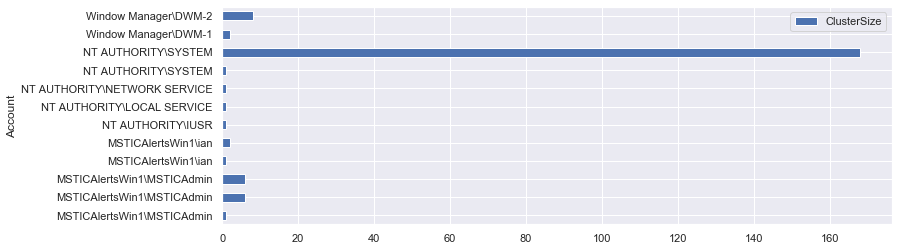

In [29]:
from msticpy.sectools.eventcluster import (
    dbcluster_events,
    add_process_features,
    _string_score,
)

if host_logons is None or host_logons.empty:
    display(Markdown("No host logons recorded. This section cannot be run."))
    raise ValueError("aborted")

# Set up clustering features and run DBScan clustering
logon_features = host_logons.copy()
logon_features["AccountNum"] = host_logons.apply(
    lambda x: _string_score(x.Account), axis=1
)
logon_features["TargetUserNum"] = host_logons.apply(
    lambda x: _string_score(x.TargetUserName), axis=1
)
logon_features["LogonHour"] = host_logons.apply(lambda x: x.TimeGenerated.hour, axis=1)

# you might need to play around with the max_cluster_distance parameter.
# decreasing this gives more clusters.
(clus_logons, _, _) = dbcluster_events(
    data=logon_features,
    time_column="TimeGenerated",
    cluster_columns=["AccountNum", "LogonType", "TargetUserNum"],
    max_cluster_distance=0.0001,
)
display(Markdown(f"Number of input events: {len(host_logons)}"))
display(Markdown(f"Number of clustered events: {len(clus_logons)}"))

display(Markdown("### Relative frequencies by account pattern"))
plt.rcParams["figure.figsize"] = (12, 4)
clus_logons.sort_values("Account").plot.barh(x="Account", y="ClusterSize");


 ## View distinct host logon patterns

In [30]:
import re

# Build a list of distinct logon patterns from the clustered data
dist_logons = clus_logons.sort_values("TimeGenerated")[
    ["TargetUserName", "TimeGenerated", "LastEventTime", "LogonType", "ClusterSize"]
]
dist_logons = dist_logons.apply(
    lambda x: (
        f"{x.TargetUserName}:    "
        f"(logontype {x.LogonType})   "
        f"timerange: {x.TimeGenerated} - {x.LastEventTime}    "
        f"count: {x.ClusterSize}"
    ),
    axis=1,
)
# Convert to dict, flipping keys/values
dist_logons = {v: k for k, v in dist_logons.to_dict().items()}


def get_selected_logon_cluster(selected_item):
    acct = clus_logons.loc[selected_item]["TargetUserName"]
    logon_type = clus_logons.loc[selected_item]["LogonType"]
    return host_logons.query("TargetUserName == @acct and LogonType == @logon_type")


# Create an Output widget to show the Logon Details
w_output = widgets.Output(layout={"border": "1px solid black"})


def show_logon(idx):
    w_output.clear_output()
    with w_output:
        nbdisplay.display_logon_data(pd.DataFrame(clus_logons.loc[idx]).T)


logon_wgt = nbwidgets.SelectString(
    description="Select logon cluster to examine",
    item_dict=dist_logons,
    action=show_logon,
    height="200px",
    width="100%",
    auto_display=True,
)
display(w_output)
# Display the first item on first view
top_item = next(iter(dist_logons.values()))
with w_output:
    nbdisplay.display_logon_data(pd.DataFrame(clus_logons.loc[top_item]).T)


Output(layout=Layout(border='1px solid black'))

 ## Analyze Processes Patterns for logon sessions
 
In this section we look at the types of processes run in each logon session. For each process (and process characteristics such as command line structure) we measure its rarity compared to other processes on the same host. We then calculate the mean rarity of all processes in a logon session and display the results ordered by rarity. One is the highest possible score and would indicate all processes in the session have a unique execution pattern.
 
Note: The next section retrieves processes for time period around the logons for the user ID selected in the previous session. If you want to view a broader time boundary please adjust the query time boundaries in below.

In [31]:
# set the origin time to start at the first logon in our set
# end end 2hrs after the last
start_time = host_logons["TimeGenerated"].min()
end_time = host_logons["TimeGenerated"].max()
time_diff = int((end_time - start_time).total_seconds() / (60 * 60) + 2)
proc_query_times = nbwidgets.QueryTime(
    units="hours",
    origin_time=start_time,
    before=1,
    after=time_diff + 1,
    max_before=20,
    max_after=time_diff + 20,
)
proc_query_times.display()


HTML(value='<h4>Set query time boundaries</h4>')

 ### Compute the relative rarity of processes in each session
 This should be a good guide to which sessions are the more interesting to look at.
 
 **Note** Clustering lots (1000s) of events will take a little time to compute.

In [32]:
from msticpy.sectools.eventcluster import dbcluster_events, add_process_features
from collections import Counter

print("Getting process events...", end="")
processes_on_host = qry_prov.WindowsSecurity.list_host_processes(
    proc_query_times, host_name=host_entity.HostName
)
print(f"done. {len(processes_on_host)} events")
print("Clustering. Please wait...", end="")
feature_procs = add_process_features(input_frame=processes_on_host, path_separator="\\")

feature_procs["accountNum"] = feature_procs.apply(
    lambda x: _string_score(x.Account), axis=1
)
# you might need to play around with the max_cluster_distance parameter.
# decreasing this gives more clusters.
(clus_events, dbcluster, x_data) = dbcluster_events(
    data=feature_procs,
    cluster_columns=[
        "commandlineTokensFull",
        "pathScore",
        "accountNum",
        "isSystemSession",
    ],
    max_cluster_distance=0.0001,
)
print("done")
print("Number of input events:", len(feature_procs))
print("Number of clustered events:", len(clus_events))

# Join the clustered results back to the original process frame
procs_with_cluster = feature_procs.merge(
    clus_events[
        [
            "commandlineTokensFull",
            "accountNum",
            "pathScore",
            "isSystemSession",
            "ClusterSize",
        ]
    ],
    on=["commandlineTokensFull", "accountNum", "pathScore", "isSystemSession"],
)
# Rarity = inverse of cluster size
procs_with_cluster["Rarity"] = 1 / procs_with_cluster["ClusterSize"]
# count the number of processes for each logon ID
lgn_proc_count = (
    pd.concat(
        [
            processes_on_host.groupby("TargetLogonId")["TargetLogonId"].count(),
            processes_on_host.groupby("SubjectLogonId")["SubjectLogonId"].count(),
        ]
    ).sum(level=0)
).to_dict()

# Display the results
md("Sessions ordered by process rarity", 'bold')
md("Higher score indicates higher number of unusual processes")
process_rarity = (procs_with_cluster.groupby(["SubjectUserName", "SubjectLogonId"])
    .agg({"Rarity": "mean", "TimeGenerated": "count"})
    .rename(columns={"TimeGenerated": "ProcessCount"})
    .reset_index())
display(
    process_rarity
    .sort_values("Rarity", ascending=False)
    .style.bar(subset=["Rarity"], color="#d65f5f")
)


Getting process events...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

done. 29982 events
Clustering. Please wait...done
Number of input events: 29982
Number of clustered events: 290


,SubjectUserName,SubjectLogonId,Rarity,ProcessCount
0,-,0x3e7,0.7,10
12,ian,0x5d5af2,0.607143,56
2,MSTICAdmin,0x2e2017,0.527679,30
7,MSTICAdmin,0xbed1e13,0.516128,21
5,MSTICAdmin,0xab5a5ac,0.442336,8
9,MSTICAdmin,0xc54c7b9,0.36267,7
4,MSTICAdmin,0x96b8171,0.266808,38
6,MSTICAdmin,0xbd57571,0.266808,38
8,MSTICAdmin,0xc277459,0.256448,6
3,MSTICAdmin,0x527d50d,0.0625,7


### Overview of session timelines for sessions with higher rarity score

In [33]:
# Display process timeline for 75% percentile rarest scores
rare_sess = process_rarity[process_rarity["Rarity"]
                           > process_rarity["Rarity"].quantile(.25)]
rare_sessions = processes_on_host[(processes_on_host["SubjectLogonId"]
                                   .isin(rare_sess["SubjectLogonId"]))
                                  & (processes_on_host["SubjectUserName"]
                                     .isin(rare_sess["SubjectUserName"]))]

md("Timeline of sessions with higher process rarity", "large")
md("Multiple sessions (y-axis) may be are shown for each account.")
md("You will likely need to zoom in to see the individual session processes.")

nbdisplay.display_timeline(
    data=rare_sessions,
    group_by="SubjectLogonId",
    source_columns=["SubjectUserName", "SubjectLogonId", "NewProcessName", "CommandLine"],
    legend="right",
    yaxis=True
);

Loading BokehJS ...

### View the processes for these Sessions

In [34]:
def view_logon_sess(logon_id=""):
    global selected_logon
    selected_logon = host_logons[host_logons["TargetLogonId"] == logon_id]

    if all_procs.value:
        sess_procs = processes_on_host.query(
            "TargetLogonId == @logon_id | SubjectLogonId == @logon_id"
        )
    else:
        sess_procs = procs_with_cluster.query("SubjectLogonId == @logon_id")[
            ["NewProcessName", "CommandLine", "SubjectLogonId", "ClusterSize"]
        ].drop_duplicates()
    display(sess_procs)

sessions = list(process_rarity
                .sort_values("Rarity", ascending=False)
                .apply(lambda x: (f"{x.SubjectLogonId}  {x.SubjectUserName}   Rarity={x.Rarity}",
                                  x.SubjectLogonId), 
                       axis=1))
all_procs = widgets.Checkbox(
    value=False,
    description="View All Processes (Show clustered only if not checked)",
    **WIDGET_DEFAULTS,
)
display(all_procs)
logon_wgt = nbwidgets.SelectString(
    description="Select logon session to examine",
    item_dict={label: val for label, val in sessions},
    height="300px",
    width="100%",
    auto_display=True,
    action=view_logon_sess,
)


Checkbox(value=False, description='View All Processes (Show clustered only if not checked)', layout=Layout(wid…

## Browse All Sessions (Optional)

**If the previous section did not reveal anything interesting you can opt to browse all logon sessions.**

**Otherwise, skip to the [Check Commandline for IoCs section](#Check-for-IOCs-in-Commandline-for-selected-session)**

To do this you need to first pick an account + logon type (in the following cell) then pick a particular session that you want to view in the subsequent cell. Use the rarity score from the previous graph to guide you.

 ### Step 1 - Select a logon ID and Type

In [35]:
logon_wgt2 = nbwidgets.SelectString(
    description="Select logon cluster to examine",
    item_dict=dist_logons,
    height="200px",
    width="100%",
    auto_display=True,
)
all_procs = widgets.Checkbox(
    value=False,
    description="View All Processes (Clustered only if not checked)",
    **WIDGET_DEFAULTS,
)
display(all_procs)


Checkbox(value=False, description='View All Processes (Clustered only if not checked)', layout=Layout(width='9…

 ### Step 2 - Pick a logon session to view its processes

In [ ]:
selected_logon_cluster = get_selected_logon_cluster(logon_wgt2.value)

selected_tgt_logon = selected_logon_cluster["TargetUserName"].iat[0]
system_logon = selected_tgt_logon.lower() == "system" or selected_tgt_logon.endswith(
    "$"
)

if system_logon:
    display(
        Markdown(
            '<h3><p style="color:red">Warning: the selected '
            "account name appears to be a system account.</p></h1><br>"
            "<i>It is difficult to accurately associate processes "
            "with the specific logon sessions.<br>"
            "Showing clustered events for entire time selection."
        )
    )
    display(
        clus_events.sort_values("TimeGenerated")[
            [
                "TimeGenerated",
                "LastEventTime",
                "NewProcessName",
                "CommandLine",
                "ClusterSize",
                "commandlineTokensFull",
                "pathScore",
                "isSystemSession",
            ]
        ]
    )

# Display a pick list for logon instances
sel_1 = host_logons["TargetLogonId"].isin(lgn_proc_count)
sel_2 = host_logons["TargetUserName"] == selected_tgt_logon
items = (
    host_logons[sel_1 & sel_2]
    .sort_values("TimeGenerated")
    .apply(
        lambda x: (
            f"{x.TargetUserName}:    "
            f"(logontype={x.LogonType})   "
            f"(timestamp={x.TimeGenerated})    "
            f"logonid={x.TargetLogonId}"
        ),
        axis=1,
    )
    .values.tolist()
)
if not items:
    items = ["No processes for logon"]
sess_w = widgets.Select(
    options=items, description="Select logon instance to examine", **WIDGET_DEFAULTS
)

import re

logon_list_regex = r"""
(?P<acct>[^:]+):\s+
\(logontype=(?P<logon_type>[^)]+)\)\s+
\(timestamp=(?P<time>[^)]+)\)\s+
logonid=(?P<logonid>[0-9a-fx)]+)
"""


def get_selected_logon(selected_item):
    acct_match = re.search(logon_list_regex, selected_item, re.VERBOSE)
    if acct_match:
        acct = acct_match["acct"]
        logon_type = int(acct_match["logon_type"])
        time_stamp = pd.to_datetime(acct_match["time"])
        logon_id = acct_match["logonid"]
        return host_logons.query(
            "TargetUserName == @acct and LogonType == @logon_type"
            " and TargetLogonId == @logon_id"
        )


def view_logon_sess(x=""):
    global selected_logon
    selected_logon = get_selected_logon(x)
    if selected_logon is not None:
        logonId = selected_logon["TargetLogonId"].iloc[0]
        if all_procs.value:
            sess_procs = processes_on_host.query(
                "TargetLogonId == @logonId | SubjectLogonId == @logonId"
            )
        else:
            sess_procs = procs_with_cluster.query("SubjectLogonId == @logonId")[
                ["NewProcessName", "CommandLine", "SubjectLogonId", "ClusterSize"]
            ].drop_duplicates()
        display(sess_procs)


widgets.interactive(view_logon_sess, x=sess_w)


 <a></a>[Contents](#toc)
 # Check for IOCs in Commandline for selected session
 This section looks for Indicators of Compromise (IoC) within the data sets passed to it.
 
 The input data for this comes from the session you picked in the following sections:
 - [Compute the relative rarity of processes in each session](#View-the-processes-for-these-Sessions)
 - [Browse All Sessions](#Step-2---Pick-a-logon-session-to-view-its-processes)
 
To change which section is used - go back to the desired section and pick a session or re-run the entire cell.

## Extract IoCs

In [ ]:
# Use this to search all process commandlines
# ioc_df = ioc_extractor.extract(
#     data=procs_with_cluster,
#     columns=["CommandLine"],
#     os_family=os_family,
#     ioc_types=["ipv4", "ipv6", "dns", "url", "md5_hash", "sha1_hash", "sha256_hash"],
# )
# ioc_df[["IoCType", "Observable"]].drop_duplicates()

In [36]:
selected_tgt_logon = selected_logon["TargetUserName"].iat[0]
system_logon = (selected_tgt_logon.lower() == "system" 
                or selected_tgt_logon.endswith("$"))
if not system_logon:
    logonId = selected_logon["TargetLogonId"].iloc[0]
    sess_procs = processes_on_host.query(
        "TargetLogonId == @logonId | SubjectLogonId == @logonId"
    )
else:
    sess_procs = clus_events

ioc_extractor = IoCExtract()
os_family = host_entity.OSType if host_entity.OSType else "Windows"

ioc_df = ioc_extractor.extract(
    data=sess_procs,
    columns=["CommandLine"],
    os_family=os_family,
    ioc_types=["ipv4", "ipv6", "dns", "url", "md5_hash", "sha1_hash", "sha256_hash"],
)
if len(ioc_df):
    display(Markdown("### IoC patterns found in process set."))
    display(ioc_df[["IoCType", "Observable"]].drop_duplicates())
else:
    display(Markdown("### No IoC patterns found in process tree."))


### IoC patterns found in process set.

,IoCType,Observable
0,md5_hash,772A9CF421EEC37E11490F01D0EDD091


 ## If any Base64 encoded strings, decode and search for IoCs in the results.
 &lt;details&gt;
     <summary> <u>Details...</u></summary>
 This section looks for base64 encoded strings within the data - this is a common way of hiding attacker intent. It attempts to decode any strings that look like base64. Additionally, if the base64 decode operation returns any items that look like a base64 encoded string or file, a gzipped binary sequence, a zipped or tar archive, it will attempt to extract the contents before searching for potentially interesting IoC observables within the decoded data.

 For simple strings the Base64 decoded output is straightforward. However for nested encodings this can get a little complex and difficult to represent in a tabular format.

 **Columns**
  - reference - The index of the row item in dotted notation in depth.seq pairs (e.g. 1.2.2.3 would be the 3 item at depth 3 that is a child of the 2nd item found at depth 1). This may not always be an accurate notation - it is mainly use to allow you to associate an individual row with the reference value contained in the full_decoded_string column of the topmost item).
  - original_string - the original string before decoding.
  - file_name - filename, if any (only if this is an item in zip or tar file).
  - file_type - a guess at the file type (this is currently elementary and only includes a few file types).
  - input_bytes - the decoded bytes as a Python bytes string.
  - decoded_string - the decoded string if it can be decoded as a UTF-8 or UTF-16 string. Note: binary sequences may often successfully decode as UTF-16 strings but, in these cases, the decodings are meaningless.
  - encoding_type - encoding type (UTF-8 or UTF-16) if a decoding was possible, otherwise 'binary'.
  - file_hashes - collection of file hashes for any decoded item.
  - md5 - md5 hash as a separate column.
  - sha1 - sha1 hash as a separate column.
  - sha256 - sha256 hash as a separate column.
  - printable_bytes - printable version of input_bytes as a string of \xNN values
  - src_index - the index of the row in the input dataframe from which the data came.
  - full_decoded_string - the full decoded string with any decoded replacements. This is only really useful for top-level items, since nested items will only show the 'full' string representing the child fragment.
 &lt;/details&gt;

In [37]:

dec_df = base64.unpack_items(data=sess_procs, column="CommandLine")
if dec_df is not None and len(dec_df) > 0:
    display(HTML("<h3>Decoded base 64 command lines</h3>"))
    display(HTML("Decoded values and hashes of decoded values shown below."))
    display(
        HTML(
            "Warning - some binary patterns may be decodable as unicode strings. "
            'In these cases you should ignore the "decoded_string" column '
            'and treat the encoded item as a binary - using the "printable_bytes" '
            "column or treat the decoded_string as a binary (bytes) value."
        )
    )

    display(
        dec_df[
            [
                "full_decoded_string",
                "decoded_string",
                "original_string",
                "printable_bytes",
                "file_hashes",
            ]
        ]
    )

    ioc_dec_df = ioc_extractor.extract(data=dec_df, columns=["full_decoded_string"])
    if len(ioc_dec_df):
        display(HTML("<h3>IoC patterns found in events with base64 decoded data</h3>"))
        display(ioc_dec_df)
        ioc_df = ioc_df.append(ioc_dec_df, ignore_index=True)
else:
    print("No base64 encodings found.")


,full_decoded_string,decoded_string,original_string,printable_bytes,file_hashes
0,C:\Windows\syswow64\MsiExec.exe -Embedding <decoded value='binary' name='[None]' type='None' in...,None,772A9CF421EEC37E11490F01D0EDD091,ef bd 80 f4 21 78 db 51 04 0b 7e c4 d7 5e 3d d0 5d 35 0f 41 03 0f 4f 75,"{'md5': 'f284c50c3dd4112fbca71622c2ce4db3', 'sha1': 'a3e3b452db61966ff162bb3643ffe97c14ec6bbf', ..."
1,"""C:\Windows\SystemApps\ShellExperienceHost_cw5n1h2txyewy\ShellExperienceHost.exe"" -ServerName:Ap...",None,AppXtk181tbxbce2qsex02s8tw7hfxa9xb3t,02 9a 57 b6 4d 7c d6 d6 f1 6d c7 b6 aa c7 b1 d3 6b 3c b7 0e e1 7f 16 bd c5 bd ed,"{'md5': 'a211a9514a49da9e6decde754900ef93', 'sha1': 'cfb4205b995207b0a3a882b2c9e881e90c2a4fd4', ..."
2,"""C:\Windows\SystemApps\Microsoft.Windows.Cortana_cw5n1h2txyewy\SearchUI.exe"" -ServerName:Cortana...",None,AppXa50dqqa5gqv4a428c9y1jjw7m3btvepj,02 9a 57 6b 9d 1d aa a6 b9 82 ab f8 6b 8d bc 73 dc b5 8e 3c 3b 9b 76 ed bd ea 63,"{'md5': '074aacdb0dac716f92dbba0de5f0d907', 'sha1': '1a459444f083f2aa488c871c682bb2d2544959e5', ..."


  [Contents](#Contents)
 ## Threat Intel Lookup

 This section takes the output from the IoC Extraction from commandlines and submits it to Threat Intelligence services to see if any of the IoC are known threats.

Please take a moment to review the `Selected` list below and remove any items that are obviously not items that you want to lookup (e.g. `myadmintool.ps` is almost certainly a PowerShell script but is also a valid match for a legal DNS domain).
<details>
    <summary>TI Configuration</summary>
If you have not used msticpy threat intelligence lookups before you will need to supply API keys for the 
TI Providers that you want to use. Please see the section on configuring [msticpyconfig.yaml](#msticpyconfig.yaml-configuration-File)

Then reload provider settings:
```
mylookup = TILookup()
mylookup.reload_provider_settings()
```
</details>

In [38]:
ti_lookup = TILookup()
ti_lookup.provider_status

items = list(ioc_df["Observable"].values)
ioc_ss = nbwidgets.SelectSubset(
    items,
    default_selected=items
)

<IPython.core.display.Javascript object>

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank


In [39]:
iocs_to_check = (ioc_df[ioc_df["Observable"].isin(ioc_ss.selected_items)]
                 [["IoCType", "Observable"]].drop_duplicates())

ti_lookup.lookup_iocs(data=iocs_to_check, obs_col="Observable", ioc_type_col="IoCType")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Ioc,IocType,QuerySubtype,Reference,Result,Details,Status,Severity,Provider,RawResult
0,772A9CF421EEC37E11490F01D0EDD091,md5_hash,None,ThreatIntelligenceIndicator | where TimeGenerated >= datetime(2020-02-23T02:00:10.403100Z) | w...,False,Not found.,0,0,AzSTI,NaN
0,772A9CF421EEC37E11490F01D0EDD091,md5_hash,None,https://otx.alienvault.com/api/v1/indicators/file/772A9CF421EEC37E11490F01D0EDD091/general,True,"{'pulse_count': 0, 'sections_available': ['general', 'analysis']}",0,information,OTX,"{'indicator': '772a9cf421eec37e11490f01d0edd091', 'sections': ['general', 'analysis'], 'pulse_in..."
0,772A9CF421EEC37E11490F01D0EDD091,md5_hash,None,https://www.virustotal.com/vtapi/v2/file/report,False,Request forbidden. Allowed query rate may have been exceeded.,403,information,VirusTotal,<Response [403]>
0,772A9CF421EEC37E11490F01D0EDD091,md5_hash,None,https://api.xforce.ibmcloud.com/malware/772A9CF421EEC37E11490F01D0EDD091,False,Not found.,404,information,XForce,<Response [404]>


 <a></a>[Contents](#toc)
 # Network Check Communications with Other Hosts

In [40]:
ip_q_times = nbwidgets.QueryTime(
    label="Set time bounds for network queries",
    units="day",
    max_before=28,
    before=2,
    after=5,
    max_after=28,
    origin_time=proc_query_times.origin_time
)
ip_q_times.display()



HTML(value='<h4>Set time bounds for network queries</h4>')

 ## Query Flows by Host IP Addresses

In [41]:
if "AzureNetworkAnalytics_CL" not in table_index:
    md_warn("AzureNetworkAnalytics_CL table is not available.")
    md("No network flow data available. "
       + "Please skip the remainder of this section.",
      "blue, bold")
    az_net_comms_df = None
else:
    all_host_ips = (
        host_entity.private_ips + host_entity.public_ips + [host_entity.IPAddress]
    )
    host_ips = [i.Address for i in all_host_ips]

    az_net_comms_df = qry_prov.Network.list_azure_network_flows_by_ip(
        ip_q_times, ip_address_list=host_ips
    )

    if isinstance(az_net_comms_df, pd.DataFrame) and not az_net_comms_df.empty:
        az_net_comms_df['TotalAllowedFlows'] = az_net_comms_df['AllowedOutFlows'] + az_net_comms_df['AllowedInFlows']
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="L7Protocol",
            title="Network Flows by Protocol",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="FlowDirection",
            title="Network Flows by Direction",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
    else:
        print("No network data for specified time range.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading BokehJS ...

Loading BokehJS ...

In [43]:
if az_net_comms_df is not None and not az_net_comms_df.empty:
    flow_plot = nbdisplay.display_timeline_values(
        data=az_net_comms_df,
        group_by="L7Protocol",
        source_columns=["FlowType", 
                        "AllExtIPs", 
                        "L7Protocol", 
                        "FlowDirection", 
                        "TotalAllowedFlows"],
        time_column="FlowStartTime",
        title="Network flows by Layer 7 Protocol",
        y="TotalAllowedFlows",
        ref_event=related_alert,
        legend="right",
        height=500,
        kind=["vbar", "circle"]
    );
else:
    md("No network data for specified time range.")

Loading BokehJS ...

 ## Flow Summary

In [47]:
if az_net_comms_df is not None and not az_net_comms_df.empty:
    cm = sns.light_palette("green", as_cmap=True)

    cols = [
        "VMName",
        "VMIPAddress",
        "PublicIPs",
        "SrcIP",
        "DestIP",
        "L4Protocol",
        "L7Protocol",
        "DestPort",
        "FlowDirection",
        "AllExtIPs",
        "TotalAllowedFlows",
    ]
    flow_index = az_net_comms_df[cols].copy()

    def get_source_ip(row):
        if row.FlowDirection == "O":
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP
        else:
            return row.AllExtIPs if row.AllExtIPs else row.DestIP

    def get_dest_ip(row):
        if row.FlowDirection == "O":
            return row.AllExtIPs if row.AllExtIPs else row.DestIP
        else:
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP

    flow_index["source"] = flow_index.apply(get_source_ip, axis=1)
    flow_index["dest"] = flow_index.apply(get_dest_ip, axis=1)
    md(f"{len(flow_index)} events in flow index")

    # Uncomment to view flow_index results
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         display(
#             flow_index[
#                 ["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]
#             ]
#             .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
#             .sum()
#             .reset_index()
#             .style.bar(subset=["TotalAllowedFlows"], color="#d65f5f")
#         )
else:
    md("No network data for specified time range.")


In [48]:
# WHOIS lookup function
from functools import lru_cache
from ipwhois import IPWhois
from ipaddress import ip_address


@lru_cache(maxsize=1024)
def get_whois_info(ip_lookup, show_progress=False):
    try:
        ip = ip_address(ip_lookup)
    except ValueError:
        return "Not an IP Address", {}
    if ip.is_private:
        return "private address", {}
    if not ip.is_global:
        return "other address", {}
    whois = IPWhois(ip)
    whois_result = whois.lookup_whois()
    if show_progress:
        print(".", end="")
    return whois_result["asn_description"], whois_result


# Add ASN informatio from Whois
flows_df = (
    flow_index[["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]]
    .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
    .sum()
    .reset_index()
)

num_ips = len(flows_df["source"].unique()) + len(flows_df["dest"].unique())
print(f"Performing WhoIs lookups for {num_ips} IPs ", end="")
#flows_df = flows_df.assign(DestASN="", DestASNFull="", SourceASN="", SourceASNFull="")
flows_df["DestASN"] = flows_df.apply(lambda x: get_whois_info(x.dest, True), axis=1)
flows_df["SourceASN"] = flows_df.apply(lambda x: get_whois_info(x.source, True), axis=1)
print("done")

# Split the tuple returned by get_whois_info into separate columns
flows_df["DestASNFull"] = flows_df.apply(lambda x: x.DestASN[1], axis=1)
flows_df["DestASN"] = flows_df.apply(lambda x: x.DestASN[0], axis=1)
flows_df["SourceASNFull"] = flows_df.apply(lambda x: x.SourceASN[1], axis=1)
flows_df["SourceASN"] = flows_df.apply(lambda x: x.SourceASN[0], axis=1)

our_host_asns = [get_whois_info(ip.Address)[0] for ip in host_entity.public_ips]
md(f"Host {host_entity.HostName} ASNs:", "bold")
md(str(our_host_asns))

flow_sum_df = flows_df.groupby(["DestASN", "SourceASN"]).agg(
    TotalAllowedFlows=pd.NamedAgg(column="TotalAllowedFlows", aggfunc="sum"),
    L7Protocols=pd.NamedAgg(column="L7Protocol", aggfunc=lambda x: x.unique().tolist()),
    source_ips=pd.NamedAgg(column="source", aggfunc=lambda x: x.unique().tolist()),
    dest_ips=pd.NamedAgg(column="dest", aggfunc=lambda x: x.unique().tolist()),
).reset_index()
flow_sum_df

Performing WhoIs lookups for 105 IPs .......................................................................................................done


,DestASN,SourceASN,TotalAllowedFlows,L7Protocols,source_ips,dest_ips
0,"AKAMAI-AS, US",private address,95.0,"[http, https]",[10.0.3.5],"[23.223.3.100, 23.32.69.100, 23.4.187.27, 23.47.27.169, 23.62.26.50, 23.79.10.221]"
1,"AKAMAI-ASN1, US",private address,49.0,[http],[10.0.3.5],"[184.50.238.226, 184.51.150.105, 23.215.98.90, 23.3.13.146, 23.3.13.152, 23.45.180.145, 23.45.18..."
2,"CENTURYLINK-US-LEGACY-QWEST, US",private address,4.0,[http],[10.0.3.5],"[65.158.47.112, 65.158.47.50]"
3,"EDGECAST, US",private address,170.0,"[https, http]",[10.0.3.5],"[72.21.81.200, 72.21.81.240, 72.21.91.29]"
4,"GOOGLE, US",private address,66.0,"[https, http]",[10.0.3.5],"[172.217.15.110, 172.217.15.78, 172.217.15.99, 172.217.3.35, 172.217.3.46, 172.217.7.131, 172.21..."
5,"HIGHWINDS3, US",private address,6.0,[http],[10.0.3.5],"[205.185.216.10, 205.185.216.42]"
6,"LEVEL3, US",private address,6.0,[http],[10.0.3.5],"[67.26.233.254, 67.26.237.254, 8.249.225.254]"
7,"MICROSOFT-CORP-MSN-AS-BLOCK, US",private address,9524.0,"[https, http, ntp]",[10.0.3.5],"[104.40.17.153, 104.43.212.12, 13.107.4.50, 13.64.188.245, 13.65.107.32, 13.67.143.117, 13.68.93..."
8,"TELE2, SE",private address,7.0,[ftp],[10.0.3.5],[90.130.70.73]
9,private address,"MICROSOFT-CORP-AS, US",2.0,[ms-wbt-server],[131.107.147.209],[10.0.3.5]


## Choose ASNs/IPs to Check for Threat Intel Reports
Choose from the list of Selected ASNs for the IPs you wish to check on.
The Source list is been pre-populated with all ASNs found in the network flow summary.

As an example, we've populated the `Selected` list with the ASNs that have the lowest number of flows to and from the host. We also remove the ASN that matches the ASN of the host we are investigating.

Please edit this list, using flow summary data above as a guide and leaving only ASNs that you are suspicious about. Typicially these would be ones with relatively low `TotalAllowedFlows` and possibly with unusual `L7Protocols`.
<details>
    <summary>TI Configuration</summary>
If you have not used msticpy threat intelligence lookups before you will need to supply API keys for the 
TI Providers that you want to use. Please see the section on configuring [msticpyconfig.yaml](#msticpyconfig.yaml-configuration-File)

Then reload provider settings:
```
mylookup = TILookup()
mylookup.reload_provider_settings()
```
</details>

In [49]:
all_asns = list(flow_sum_df["DestASN"].unique()) + list(flow_sum_df["SourceASN"].unique())
all_asns = set(all_asns) - set(["private address"])

# Select the ASNs in the 25th percentile (lowest number of flows)
quant_25pc = flow_sum_df["TotalAllowedFlows"].quantile(q=[0.25]).iat[0]
quant_25pc_df = flow_sum_df[flow_sum_df["TotalAllowedFlows"] <= quant_25pc]
other_asns = list(quant_25pc_df["DestASN"].unique()) + list(quant_25pc_df["SourceASN"].unique())
other_asns = set(other_asns) - set(our_host_asns)
md("Choose IPs from Selected ASNs to look up for Threat Intel.", "bold")
sel_asn = nbwidgets.SelectSubset(source_items=all_asns, default_selected=other_asns)

In [67]:
from itertools import chain
from msticpy.sectools.tiproviders.ti_provider_base import TISeverity

def ti_check_ser_sev(severity, threshold):
    threshold = TISeverity.parse(threshold)
    return severity.apply(lambda x: TISeverity.parse(x) >= threshold)


dest_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["DestASN"].isin(sel_asn.selected_items)]["dest_ips"]))
src_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["SourceASN"].isin(sel_asn.selected_items)]["source_ips"]))
selected_ips = dest_ips | src_ips
md(f"{len(selected_ips)} unique IPs in selected ASNs")

# Add the IoCType to save cost of inferring each item
md("Looking up TI...")
selected_ip_dict = {ip: "ipv4" for ip in selected_ips}
ti_results = ti_lookup.lookup_iocs(data=selected_ip_dict)

md(f"{len(ti_results)} results received.")

ti_results_pos = ti_results[ti_check_ser_sev(ti_results["Severity"], 1)]
print(f"{len(ti_results_pos)} positive results found.")

if not ti_results_pos.empty:
    src_pos = flows_df.merge(ti_results_pos, left_on="source", right_on="Ioc")
    dest_pos = flows_df.merge(ti_results_pos, left_on="dest", right_on="Ioc")
    ti_ip_results = pd.concat([src_pos, dest_pos])
    md_warn("Positive Threat Intel Results found for the following flows")
    md("Please examine these IP flows using the IP Explorer notebook.", "bold, large")
    display(ti_ip_results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 positive results found.


,source,dest,L7Protocol,FlowDirection,TotalAllowedFlows,DestASN,SourceASN,DestASNFull,SourceASNFull,Ioc,IocType,QuerySubtype,Reference,Result,Details,Status,Severity,Provider,RawResult
0,10.0.3.5,205.185.216.10,http,O,5.0,"HIGHWINDS3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '20446', 'asn_cidr': '205.185.216.0/24', 'asn_count...",{},205.185.216.10,ipv4,None,https://otx.alienvault.com/api/v1/indicators/IPv4/205.185.216.10/general,True,"{'pulse_count': 10, 'names': ['Reconnaissance Operations - Oct', 'Test Pulse - 2019-07-30T02H', ...",0,high,OTX,"{'sections': ['general', 'geo', 'reputation', 'url_list', 'passive_dns', 'malware', 'nids_list',..."
1,10.0.3.5,205.185.216.10,http,O,5.0,"HIGHWINDS3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '20446', 'asn_cidr': '205.185.216.0/24', 'asn_count...",{},205.185.216.10,ipv4,None,https://api.xforce.ibmcloud.com/ipr/205.185.216.10,True,"{'score': 4.3, 'cats': {'Anonymisation Services': 43, 'Scanning IPs': 14}, 'categoryDescriptions...",0,high,XForce,"{'ip': '205.185.216.10', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional..."
2,10.0.3.5,205.185.216.42,http,O,1.0,"HIGHWINDS3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '20446', 'asn_cidr': '205.185.216.0/24', 'asn_count...",{},205.185.216.42,ipv4,None,https://otx.alienvault.com/api/v1/indicators/IPv4/205.185.216.42/general,True,"{'pulse_count': 9, 'names': ['Spam Email Dump', 'Trickbot by @angel11VR', 'Emotet latest roundup...",0,high,OTX,"{'sections': ['general', 'geo', 'reputation', 'url_list', 'passive_dns', 'malware', 'nids_list',..."
3,10.0.3.5,205.185.216.42,http,O,1.0,"HIGHWINDS3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '20446', 'asn_cidr': '205.185.216.0/24', 'asn_count...",{},205.185.216.42,ipv4,None,https://www.virustotal.com/vtapi/v2/ip-address/report,True,"{'verbose_msg': 'IP address in dataset', 'response_code': 1, 'detected_urls': ['http://api.ning....",0,high,VirusTotal,"{'https_certificate_date': 1585010764, 'asn': 20446, 'undetected_downloaded_samples': [{'date': ..."
4,10.0.3.5,205.185.216.42,http,O,1.0,"HIGHWINDS3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '20446', 'asn_cidr': '205.185.216.0/24', 'asn_count...",{},205.185.216.42,ipv4,None,https://api.xforce.ibmcloud.com/ipr/205.185.216.42,True,"{'score': 4.3, 'cats': {'Anonymisation Services': 43, 'Scanning IPs': 14}, 'categoryDescriptions...",0,high,XForce,"{'ip': '205.185.216.42', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional..."
5,10.0.3.5,65.158.47.112,http,O,3.0,"CENTURYLINK-US-LEGACY-QWEST, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '209', 'asn_cidr': '65.128.0.0/11', 'asn_country_co...",{},65.158.47.112,ipv4,None,https://api.xforce.ibmcloud.com/ipr/65.158.47.112,True,"{'score': 1, 'cats': {}, 'categoryDescriptions': {}, 'reason': 'Regional Internet Registry', 're...",0,warning,XForce,"{'ip': '65.158.47.112', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional ..."
6,10.0.3.5,65.158.47.50,http,O,1.0,"CENTURYLINK-US-LEGACY-QWEST, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '209', 'asn_cidr': '65.128.0.0/11', 'asn_country_co...",{},65.158.47.50,ipv4,None,https://api.xforce.ibmcloud.com/ipr/65.158.47.50,True,"{'score': 1, 'cats': {}, 'categoryDescriptions': {}, 'reason': 'Regional Internet Registry', 're...",0,warning,XForce,"{'ip': '65.158.47.50', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional I..."
7,10.0.3.5,67.26.233.254,http,O,1.0,"LEVEL3, US",private address,"{'nir': None, 'asn_registry': 'arin', 'asn': '3356', 'asn_cidr': '67.24.0.0/13', 'asn_country_co...",{},67.26.233.254,ipv4,None,https://api.xforce.ibmcloud.com/ipr/67.26.233.254,True,"{'score': 1, 'cats': {}, 'categoryDescriptions': {}, 'reason': 'Regional Internet Registry', 're...",0,warning,XForce,"{'ip': '67.26.233.254', 'history': [{'created': '201

 ## GeoIP Map of External IPs

In [71]:
def format_ip_entity(row, ip_col):
    ip_entity = entities.IpAddress(Address=row[ip_col])
    iplocation.lookup_ip(ip_entity=ip_entity)
    ip_entity.AdditionalData["protocol"] = row.L7Protocol
    if "severity" in row:
        ip_entity.AdditionalData["threat severity"] = row["severity"]
    if "Details" in row:
        ip_entity.AdditionalData["threat details"] = row["Details"]
    return ip_entity

# from msticpy.nbtools.foliummap import FoliumMap
folium_map = FoliumMap(zoom_start=4)
if az_net_comms_df is None or az_net_comms_df.empty:
    print("No network flow data available.")
else:
    # Get the flow records for all flows not in the TI results
    selected_out = flows_df[flows_df["DestASN"].isin(sel_asn.selected_items)]
    selected_out = selected_out[~selected_out["dest"].isin(ti_ip_results["Ioc"])]
    if selected_out.empty:
        ips_out = []
    else:
        ips_out = list(selected_out.apply(lambda x: format_ip_entity(x, "dest"), axis=1))
    
    selected_in = flows_df[flows_df["SourceASN"].isin(sel_asn.selected_items)]
    selected_in = selected_in[~selected_in["source"].isin(ti_ip_results["Ioc"])]
    if selected_in.empty:
        ips_in = []
    else:
        ips_in = list(selected_in.apply(lambda x: format_ip_entity(x, "source"), axis=1))

    ips_threats = list(ti_ip_results.apply(lambda x: format_ip_entity(x, "Ioc"), axis=1))

    display(HTML("<h3>External IP Addresses communicating with host</h3>"))
    display(HTML("Numbered circles indicate multiple items - click to expand"))
    display(HTML("Location markers: <br>Blue = outbound, Purple = inbound, Green = Host, Red = Threats"))

    icon_props = {"color": "green"}
    for ips in host_entity.public_ips:
        ips.AdditionalData["host"] = host_entity.HostName
    folium_map.add_ip_cluster(ip_entities=host_entity.public_ips, **icon_props)
    icon_props = {"color": "blue"}
    folium_map.add_ip_cluster(ip_entities=ips_out, **icon_props)
    icon_props = {"color": "purple"}
    folium_map.add_ip_cluster(ip_entities=ips_in, **icon_props)
    icon_props = {"color": "red"}
    folium_map.add_ip_cluster(ip_entities=ips_threats, **icon_props)
    folium_map.center_map()
    display(folium_map)


 <a></a>[Contents](#toc)
 # Appendices

 ## Available DataFrames

In [ ]:
print("List of current DataFrames in Notebook")
print("-" * 50)
current_vars = list(locals().keys())
for var_name in current_vars:
    if isinstance(locals()[var_name], pd.DataFrame) and not var_name.startswith("_"):
        print(var_name)


 ## Saving Data to Excel
 To save the contents of a pandas DataFrame to an Excel spreadsheet
 use the following syntax
 ```
 writer = pd.ExcelWriter('myWorksheet.xlsx')
 my_data_frame.to_excel(writer,'Sheet1')
 writer.save()
 ```

## Configuration

### `msticpyconfig.yaml` configuration File
You can configure primary and secondary TI providers and any required parameters in the `msticpyconfig.yaml` file. This is read from the current directory or you can set an environment variable (`MSTICPYCONFIG`) pointing to its location.

To configure this file see the [ConfigureNotebookEnvironment notebook](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)